### Scikit-learn

Scikit-learn (http://scikit-learn.org/stable/) es una librería construida a partir de Numpy, Matplotlib y Scipy que implementa herramientas para el análisis de datos, como por ejemplo algoritmos de regresión y clasificación.

Información detallada sobre esta librería se puede encontrar en la guía de usuario: http://scikit-learn.org/stable/user_guide.html

#### Ejemplo regresión

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

random.seed(1234)

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X, y = boston.data, boston.target
X.shape

(506, 13)

In [4]:
corr = np.corrcoef(X, y, rowvar=False)[:, -1]
corr

array([-0.38830461,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
        0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
       -0.50778669,  0.33346082, -0.73766273,  1.        ])

In [5]:
idx = corr[:-1].argmax()
idx

5

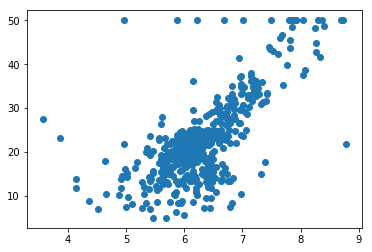

In [6]:
x = X[:, idx]
fig, ax = plt.subplots()
plt.scatter(x, y)

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x[:, None], y)

beta = lm.coef_
beta0 = lm.intercept_

ypred = beta * x + beta0

print(beta)
print(beta0)
print('R^2 score: {}'.format(lm.score(x[:, None],  y)))

[9.10210898]
-34.67062077643857
R^2 score: 0.4835254559913343


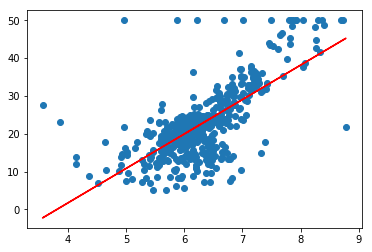

In [8]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, ypred, 'r')

In [9]:
np.mean((y - ypred)**2)

43.60055177116956

In [10]:
lm = LinearRegression()
lm.fit(X, y)
ypred = lm.predict(X)
lm.score(X, y)

0.7406426641094095

In [11]:
np.mean((y - ypred)**2)

21.894831181729202

In [30]:
from sklearn.ensemble import RandomForestRegressor
lm = RandomForestRegressor(n_estimators=100)
lm.fit(X, y)
ypred = lm.predict(X)
np.mean((y - ypred)**2)

0.01401968

In [13]:
from sklearn.ensemble import RandomForestRegressor
lm = RandomForestRegressor()
lm.fit(x[:, None], y)
ypred = lm.predict(x[:, None])
np.mean((y - ypred)**2)

/home/alberto/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


11.856672342387197

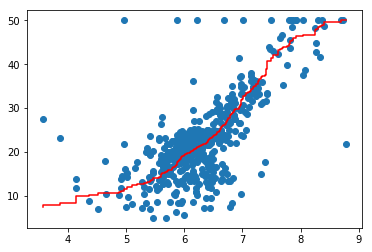

In [14]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.step(np.sort(x), np.sort(ypred), 'r')

#### Ejemplo clasificación

In [15]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0, 0.5, 'Sepal width')

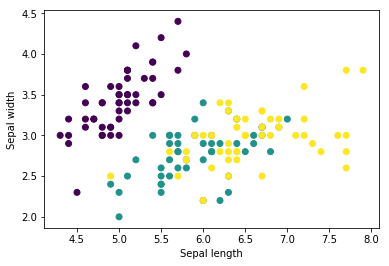

In [16]:
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Sepal width')

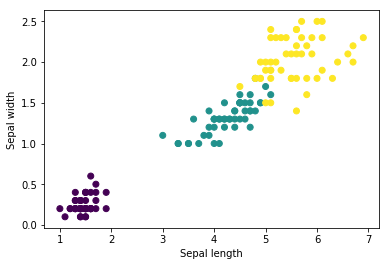

In [17]:
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

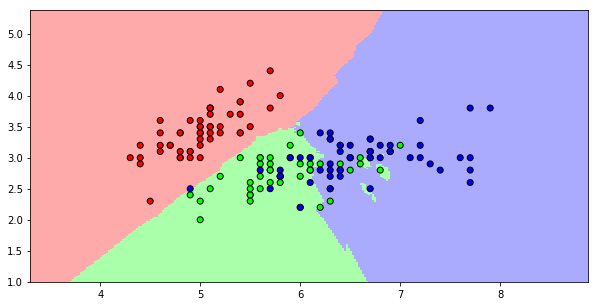

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clf = KNeighborsClassifier(15)
clf.fit(X[:, :2], y)

# crear rejilla de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# crear matriz de dos columnas con los nuevos valores a predecir
Xnew = np.column_stack((xx.ravel(), yy.ravel()))
z = clf.predict(Xnew)

# poner de vuelta en 2D para pintar
z = z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.pcolormesh(xx, yy, z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap_bold)

##### Ejercicio:

Con el conjunto de datos `titanic.csv`:
 * Hacer un gráfico de barras con el número de pasajeros que han muerto y los que han sobrevivido por género
 * Hacer un gráfico de barras con el número de personas que sobrevivieron en cada grupo de edad (0-10, 11-20, 21-30, etc) (pista: .cut())
 * Calcular la probabilidad de supervivencia en base al sexo y a la clase
 * Calcular la probabilidad de supervivencia en base la edad, al título y a la clase
 * En vista de lo anterior, completar ahora los valores que faltan de la edad con la mediana pero agrupada por título y clase. Pista: usar .transform() y ver que parámetros acepta .fillna()
 * Convertir las variables no numéricas en numéricas con `.get_dummies()`
 * Particionar el conjunto en train/test
 * Normalizar las variables para que tengan media 0 y varianza 1
 * Ajustar un clasificador `RandomForestClassifier()` y ver cuantos pasajeros clasifica correctamente en Superviviente/No superviviente

### APIs compatibles con scikit-learn

Debido a la popularidad de scikit-learn, muchos proyectos deciden ofrecer la funcionalidad que implementan también a través de una API compatible con sklearn. En ese caso, por ejemplo, podríamos usar los modelos que implementan esas librerías directamente reemplazando a cualquier modelo implementado en scikit.

Lista de proyectos: http://scikit-learn.org/stable/related_projects.html

In [21]:
# Instalar XGBoost: conda install -c conda-forge xgboost
from xgboost import XGBRegressor

boston = datasets.load_boston()
X, y = boston.data, boston.target

model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Persistencia de modelos

El objeto que contiene cada uno de los modelos, una vez entrenado, contiene toda la información para desplegar ese modelo en producción (pesos, hyper-parámetros, error de entrenamiento, etc.). Por tanto es muy común almacenarlo en disco:

In [22]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model.pkl", "rb") as f:
    model = pickle.load(f)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
from sklearn.externals import joblib

joblib.dump(model, 'model.pkl') 

model = joblib.load('model.pkl')
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Evaluación de modelos

scikit-learn implementa distintas métricas para evaluar la calidad de los modelos:

Documentación: http://scikit-learn.org/stable/modules/model_evaluation.html    
Referencia: http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics    

In [24]:
import pandas as pd
df = pd.read_csv('../data/balance-scale.data', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])

df['balance'] = [1 if b=='B' else 0 for b in df['balance']]
df['balance'].value_counts()

0    576
1     49
Name: balance, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

X = df.drop(columns='balance').values
y = df['balance'].values

print(X.shape)
print(y.shape)

model = LogisticRegression(solver='liblinear')
model.fit(X, y)
ypred = model.predict(X)
print(model.score(X, y) * 100)

print(classification_report(y, ypred))
print(confusion_matrix(y, ypred))

(625, 4)
(625,)
92.16
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       576
           1       0.00      0.00      0.00        49

   micro avg       0.92      0.92      0.92       625
   macro avg       0.46      0.50      0.48       625
weighted avg       0.85      0.92      0.88       625

[[576   0]
 [ 49   0]]


/home/alberto/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Búsqueda de hyper-parámetros

scikit-learn implementa las dos estrategias más comunes a la hora de buscar los hyper-parámetros óptimos de un modelo:
 * Búsqueda exhaustiva en rejilla (`GridSearchCV`)
 * Búsqueda aleatoria (`RandomSearchCV`)
 
También existen otras librerías con algoritmos especializados que soportan la API de scikit-learn


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

cv = GridSearchCV(estimator=rfc, 
                  param_grid=param_grid, 
                  cv=5, 
                  scoring='accuracy', 
                  return_train_score=False)

cv.fit(X, y)
print(cv.best_params_)

pd.DataFrame(cv.cv_results_).sort_values(by='mean_test_score', ascending=False)

{'max_features': 'log2', 'n_estimators': 200}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.120516,0.000845,0.010241,0.000363,log2,200,"{'max_features': 'log2', 'n_estimators': 200}",0.833333,0.848,0.888,0.872,0.846774,0.8576,0.019665,1
1,0.477780,0.038831,0.041774,0.012983,auto,700,"{'max_features': 'auto', 'n_estimators': 700}",0.833333,0.848,0.888,0.864,0.846774,0.8560,0.018731,2
0,0.134986,0.012226,0.011150,0.000880,auto,200,"{'max_features': 'auto', 'n_estimators': 200}",0.833333,0.856,0.872,0.864,0.846774,0.8544,0.013487,3
2,0.119854,0.000785,0.010085,0.000129,sqrt,200,"{'max_features': 'sqrt', 'n_estimators': 200}",0.833333,0.848,0.880,0.864,0.846774,0.8544,0.016084,3
3,0.435864,0.020790,0.035352,0.000844,sqrt,700,"{'max_features': 'sqrt', 'n_estimators': 700}",0.833333,0.864,0.864,0.864,0.846774,0.8544,0.012502,3
5,0.428996,0.005435,0.035527,0.001090,log2,700,"{'max_features': 'log2', 'n_estimators': 700}",0.833333,0.856,0.864,0.864,0.846774,0.8528,0.011654,6


###### Ejercicio:

Continuando con el ejemplo del Titanic:
 * Calcular la matriz de confusión, f1-score, precision y recall en el conjunto de test. ¿Como se interpretan estos resultados? ¿Observas algún problema?
 * Hacer un gráfico de barras con la importancia de cada una de las variables. ¿Observas algún problema?
 * Vamos a intentar mejorar el modelo probando con distintos valores de los hyper-parámetros. Primero vemos en la documentación de `RandomForestClassifier` que parámetro soporta, y a continuación elegimos 3 o 4 a explorar. Por último, probamos con 3 o 4 valores de cada uno de los parámetros anteriores y `GridSearchCV` para encontrar la combinación óptima para este problema.
 * ¿Ha mejorado la búsqueda exhaustiva el rendimiento del modelo? Vuelve a calcular las métricas del punto 1.
 * Por último, podríamos intentar mejorar las variables o crear otras nuevas. Prueba a agrupar títulos con pocas personas en categorías más generales.
 * Repetir ahora el ajuste del RandomForest, ¿mejora lo anterior el rendimiento del modelo?
 

### Escalando scikit-learn (libreria dask)

Dask-ML combina distintas aproximaciones para paralelizar algunos de los modelos dentro de la librería scikit-learn.

Referencia: http://dask-ml.readthedocs.io/en/latest/

##### Paralelización en cluster

En el caso de la búsqueda de parámetros o ciertos modelos como los RandomForest, podemos paralelizar cada una de las tareas independientes para que se ejecuten en un core de un cluster

In [32]:
# conda install -c conda-forge dask-ml
from dask_searchcv import GridSearchCV

cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, return_train_score=False)

cv.fit(X, y)
print(cv.best_params_)

pd.DataFrame(cv.cv_results_).sort_values(by='mean_test_score', ascending=False)

{'max_features': 'sqrt', 'n_estimators': 200}


,params,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_max_features,param_n_estimators
2,"{'max_features': 'sqrt', 'n_estimators': 200}",0.676587,0.165188,0.054122,0.032873,0.833333,0.880,0.872,0.864,0.846774,0.8592,0.017012,1,sqrt,200
0,"{'max_features': 'auto', 'n_estimators': 200}",0.861786,0.211037,0.137819,0.059475,0.833333,0.856,0.872,0.880,0.846774,0.8576,0.016861,2,auto,200
1,"{'max_features': 'auto', 'n_estimators': 700}",2.400526,0.245515,0.257167,0.116449,0.833333,0.856,0.880,0.872,0.846774,0.8576,0.016861,2,auto,700
3,"{'max_features': 'sqrt', 'n_estimators': 700}",2.229333,0.314527,0.236833,0.131454,0.833333,0.856,0.872,0.880,0.846774,0.8576,0.016861,2,sqrt,700
4,"{'max_features': 'log2', 'n_estimators': 200}",0.619114,0.164224,0.078239,0.055356,0.833333,0.856,0.880,0.872,0.846774,0.8576,0.016861,2,log2,200
5,"{'max_features': 'log2', 'n_estimators': 700}",1.842839,0.602011,0.128564,0.092483,0.833333,0.864,0.864,0.864,0.846774,0.8544,0.012502,6,log2,700


##### Aprendizaje incremental

Algunos algoritmos de scikit-learn soportan aprendizaje incremental, es decir, el entrenamiento no se realiza con todo el conjunto de datos a la vez sino que se entrenan sub-conjuntos llamados mini-bacthes. 

El entrenamiento es secuencial, pero solo es necesario tener en memoria el mini-batch actual, de forma que se podrían ajustar modelos con conjuntos de datos almacenados en ficheros de texto mucho más grandes que la capacidad de nuestra RAM.

Los modelos que soportan este tipo de aprendizaje se pueden en la siguiente lista: http://scikit-learn.org/stable/modules/scaling_strategies.html

Por su parte, dask proporciona la forma de importar estos ficheros que no caben en la memoria en distintos sub-conjuntos y entrenar cada uno de ellos a través del método partial_fit()

Documentacion: http://dask-ml.readthedocs.io/en/latest/incremental.html

In [35]:
from sklearn.linear_model import SGDRegressor
from dask_ml.wrappers import Incremental
from dask_ml.datasets import make_classification

X, y = make_classification(n_samples=1000, chunks=500)

est = Incremental(SGDRegressor(tol=1e-3))
est.fit(X, y)

Incremental(estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False),
      random_state=None, scoring=None, shuffle_blocks=True)

##### Ejercicio:

Realizar los siguientes puntos sobre un conjunto de datos propio con el que estés trabajando. Si no tienes ninguno disponible, puedes bajar [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) (regresión) o [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) clasificación.

* Importar los datos en un DataFrame
* Ver el tipo de cada una de las variables y comprobar que se han leído correctamente
* Identificar la variable (columna) que nos interesa predecir
* Hacer algunos gráficos exploratorios, por ejemplo, un heatmap con la correlación del resto de variables con la variable objetivo.
* Separar el DataFrame en dos, uno con todas las variables menos la variable objetivo y otro con la variable objetivo.
* Partir esos dos DataFrames en train/test
* Identificar si nos encontramos antes un problema de regresión o de clasificación.
* Entrenar 2 o 3 modelos, dependiendo del tipo de problema. Por ejemplo, si es un problema de regresión podemos probar con LinearRegression, SVR y RandomForestRegressor
* Decidir cual de los tres modelos es mejor en estos datos, comparando sus errores de validación cruzada. Pista: `cross_val_score`.
* Calcular el error del mejor modelo en nuestro conjunto de test.